# import modules

In [92]:
import pandas as pd
import sklearn
import seaborn as sns
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.model_selection
import sklearn.metrics

# Import data, do initial eyeball check

In [93]:
df = pd.read_csv('sat_gpa_v1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sat_sum  1000 non-null   int64  
 1   fy_gpa   1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


In [94]:
df.head()

,sat_sum,fy_gpa
0,1270,3.18
1,1220,3.33
2,1160,3.25
3,950,2.42
4,1070,2.63


# Setup linear regression analysis

In [95]:
pipeline = sklearn.pipeline.make_pipeline(sklearn.preprocessing.StandardScaler(), sklearn.linear_model.LinearRegression())

In [96]:
# only 2 columns in df, but using X = df['sat_sum'] doesn't work (errors later)
X = df.drop('fy_gpa', axis='columns')
y = df['fy_gpa']

In [97]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 1)
(200, 1)
(800,)
(200,)


In [98]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [99]:
# pass the test data into the trained model to get a prediction:
y_pred = pipeline.predict(X_test)


In [100]:
# test the accuracy of the prediction against the results of the y_test:
sklearn.metrics.r2_score(y_test, y_pred)

0.22107296570312407

## Initial conclusion: According to this regression test, SAT score does not appear to be a very good indicator of college GPA; only a little better than random

# Scatter Plot

Text(0.5, 1.0, 'SAT Scores and College Freshman GPA')

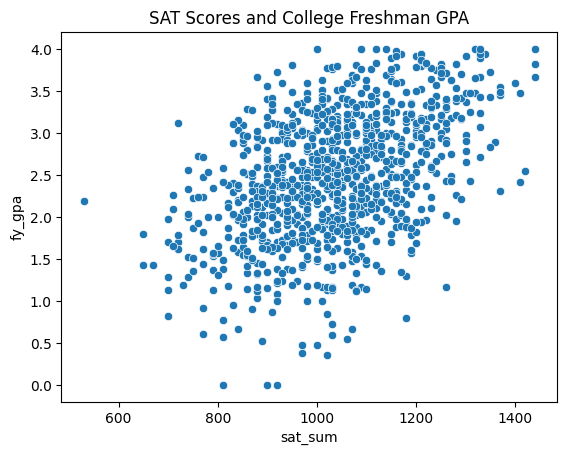

In [101]:
sns.scatterplot(data=df, x='sat_sum', y='fy_gpa').set_title('SAT Scores and College Freshman GPA')

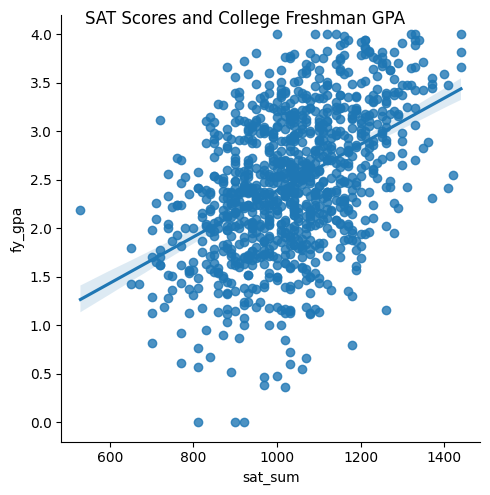

In [102]:
lm = sns.lmplot(data=df, x='sat_sum', y='fy_gpa').fig.suptitle("SAT Scores and College Freshman GPA")

## Modified conclusion:
Plots seem to indicate that there is an overall correlation between SAT score and predicted GPA, although the variation seems to be high.  This suggests that the regression test is not very accurate, and probably needs to be trained on a larger data set, ideally with additional feature variables.